<a href="https://colab.research.google.com/github/dayana-cabrera004/npl/blob/main/Lesson%202%20NLP%20Data%20Preprocessing%20Part%20II_Engage%20task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1...Preprocess the given text documents (cleaning, tokenization, etc.) and convert the text into numerical vectors using techniques like Bag of Words or TF-IDF.

In [6]:
# Step 1: Preprocessing the Text Documents
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Download stopwords
def download_nltk_resources():
    nltk.download('stopwords')
    nltk.download('punkt')

download_nltk_resources()

# Cleaning
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "The fox is a cunning animal found in many parts of the world.",
    "A dog is a domesticated carnivore of the family Canidae.",
    "The quick brown rabbit hops through the green field."
]

stop_words = set(stopwords.words('english'))

cleaned_docs = []
for doc in documents:
    # Convert text to lowercase
    doc = doc.lower()
    # Remove punctuation and special characters
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # Remove stop words
    tokens = nltk.word_tokenize(doc)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Reconstruct the document from filtered tokens
    cleaned_doc = ' '.join(filtered_tokens)
    cleaned_docs.append(cleaned_doc)

print("Cleaned Documents:", cleaned_docs)

# Step 2: Vectorization using Bag of Words
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(cleaned_docs)
print("\nBag of Words Representation:\n", count_matrix.toarray())

# Step 2: Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_docs)
print("\nTF-IDF Representation:\n", tfidf_matrix.toarray())


Cleaned Documents: ['quick brown fox jumps lazy dog', 'fox cunning animal found many parts world', 'dog domesticated carnivore family canidae', 'quick brown rabbit hops green field']

Bag of Words Representation:
 [[0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1]
 [0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0]]

TF-IDF Representation:
 [[0.         0.37222485 0.         0.         0.         0.37222485
  0.         0.         0.         0.         0.37222485 0.
  0.         0.47212003 0.47212003 0.         0.         0.37222485
  0.         0.        ]
 [0.38861429 0.         0.         0.         0.38861429 0.
  0.         0.         0.         0.38861429 0.30638797 0.
  0.         0.         0.         0.38861429 0.38861429 0.
  0.         0.38861429]
 [0.         0.         0.46516193 0.46516193 0.         0.36673901
  0.46516193 0.46516193 0.         0.         0.         0.
  0.         0.         0.        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2...Comparative Analysis: Cosine Similarity,Jaccard Similarity and Euclidean Distance.


Cosine Similarity:
 [[1.         0.11404522 0.13650937 0.25632484]
 [0.11404522 1.         0.         0.        ]
 [0.13650937 0.         1.         0.        ]
 [0.25632484 0.         0.         1.        ]]

Euclidean Distance:
 [[0.         1.33113093 1.31414659 1.21956973]
 [1.33113093 0.         1.41421356 1.41421356]
 [1.31414659 1.41421356 0.         1.41421356]
 [1.21956973 1.41421356 1.41421356 0.        ]]

Jaccard Similarity:
 [[1.         0.08333333 0.1        0.2       ]
 [0.08333333 1.         0.         0.        ]
 [0.1        0.         1.         0.        ]
 [0.2        0.         0.         1.        ]]


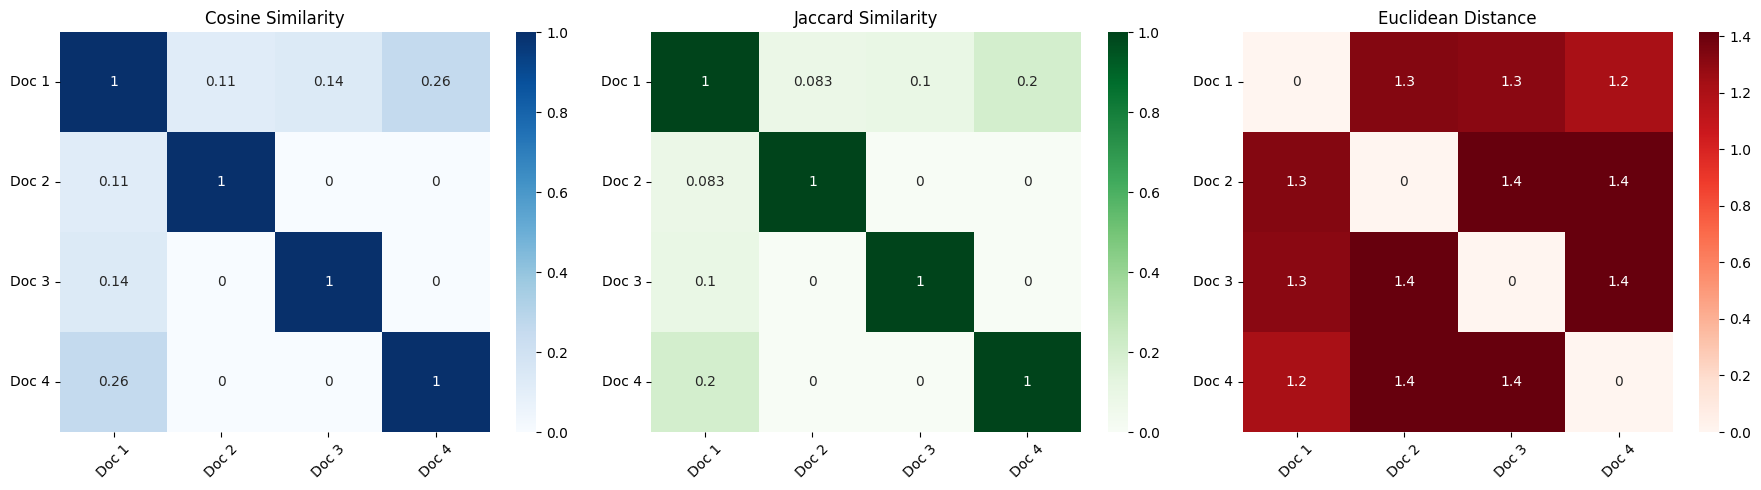


Analysis:
Cosine Similarity:
- Measures the cosine of the angle between vectors, useful for capturing similarity based on the direction rather than magnitude.
- Suitable for text classification and clustering tasks where word frequency matters.

Jaccard Similarity:
- Measures the ratio of common words to all unique words, suitable for cases where duplication doesn't matter.
- Useful for tasks like plagiarism detection and search where we care about overlap between sets of words.

Euclidean Distance:
- Measures the straight-line distance between vectors, less effective in high-dimensional space.
- Suitable for lower-dimensional data comparison, not typically used in NLP tasks involving text similarity.


In [7]:
# Step 3: Similarity Metrics Calculations
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix)
print("\nCosine Similarity:\n", cosine_sim)

# Euclidean Distance
euclidean_dist = euclidean_distances(tfidf_matrix)
print("\nEuclidean Distance:\n", euclidean_dist)

# Jaccard Similarity
def jaccard_similarity(doc1, doc2):
    set1, set2 = set(doc1.split()), set(doc2.split())
    return len(set1 & set2) / len(set1 | set2)

jaccard_similarities = np.zeros((len(cleaned_docs), len(cleaned_docs)))

for i in range(len(cleaned_docs)):
    for j in range(len(cleaned_docs)):
        jaccard_similarities[i][j] = jaccard_similarity(cleaned_docs[i], cleaned_docs[j])

print("\nJaccard Similarity:\n", jaccard_similarities)

# Step 4: Visualization of Similarity Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cosine_sim, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Cosine Similarity')
axes[0].set_xticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=45)
axes[0].set_yticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=0)

sns.heatmap(jaccard_similarities, annot=True, cmap='Greens', ax=axes[1])
axes[1].set_title('Jaccard Similarity')
axes[1].set_xticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=45)
axes[1].set_yticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=0)

sns.heatmap(euclidean_dist, annot=True, cmap='Reds', ax=axes[2])
axes[2].set_title('Euclidean Distance')
axes[2].set_xticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=45)
axes[2].set_yticklabels(["Doc 1", "Doc 2", "Doc 3", "Doc 4"], rotation=0)

plt.tight_layout()
plt.show()

# Analysis of Similarity Metrics
print("\nAnalysis:")
print("Cosine Similarity:")
print("- Measures the cosine of the angle between vectors, useful for capturing similarity based on the direction rather than magnitude.")
print("- Suitable for text classification and clustering tasks where word frequency matters.")
print("\nJaccard Similarity:")
print("- Measures the ratio of common words to all unique words, suitable for cases where duplication doesn't matter.")
print("- Useful for tasks like plagiarism detection and search where we care about overlap between sets of words.")
print("\nEuclidean Distance:")
print("- Measures the straight-line distance between vectors, less effective in high-dimensional space.")
print("- Suitable for lower-dimensional data comparison, not typically used in NLP tasks involving text similarity.")

3... Conclusion

In [8]:
# Conclusion for a 6-year-old
print("\nConclusion for a 6-year-old:")
print("Imagine you have different animals like a fox, a dog, and a rabbit. We want to know which animals are similar to each other based on their stories. We use three different ways to measure how similar they are:")
print("1. Cosine similarity is like seeing if two animals are running in the same direction, even if they don't run at the same speed.")
print("2. Jaccard similarity is like checking if two animals have similar toys, like balls or sticks, and how many they share.")
print("3. Euclidean distance is like measuring the distance between two animals, but it's not very good when there are lots of things to compare.")
print("These measurements help us understand how similar things are, which can be useful for finding matching stories or grouping similar things together.")



Conclusion for a 6-year-old:
Imagine you have different animals like a fox, a dog, and a rabbit. We want to know which animals are similar to each other based on their stories. We use three different ways to measure how similar they are:
1. Cosine similarity is like seeing if two animals are running in the same direction, even if they don't run at the same speed.
2. Jaccard similarity is like checking if two animals have similar toys, like balls or sticks, and how many they share.
3. Euclidean distance is like measuring the distance between two animals, but it's not very good when there are lots of things to compare.
These measurements help us understand how similar things are, which can be useful for finding matching stories or grouping similar things together.
